In [1]:
!git clone https://github.com/PhonePe/pulse.git

Cloning into 'pulse'...
Updating files:   9% (750/7921)
Updating files:  10% (793/7921)
Updating files:  11% (872/7921)
Updating files:  12% (951/7921)
Updating files:  13% (1030/7921)
Updating files:  14% (1109/7921)
Updating files:  15% (1189/7921)
Updating files:  16% (1268/7921)
Updating files:  17% (1347/7921)
Updating files:  17% (1411/7921)
Updating files:  18% (1426/7921)
Updating files:  19% (1505/7921)
Updating files:  20% (1585/7921)
Updating files:  21% (1664/7921)
Updating files:  22% (1743/7921)
Updating files:  23% (1822/7921)
Updating files:  24% (1902/7921)
Updating files:  24% (1912/7921)
Updating files:  25% (1981/7921)
Updating files:  26% (2060/7921)
Updating files:  27% (2139/7921)
Updating files:  28% (2218/7921)
Updating files:  29% (2298/7921)
Updating files:  30% (2377/7921)
Updating files:  31% (2456/7921)
Updating files:  31% (2488/7921)
Updating files:  32% (2535/7921)
Updating files:  33% (2614/7921)
Updating files:  34% (2694/7921)
Updating files:  34% (2

# Importing Necessary Library for data extraction

In [62]:
import pandas as pd
import json
import os
import mysql.connector as sql

# Agg_Transactionm 

In [76]:
path="D:/pythoncode/Proj/PhonePe_Project/pulse/data/aggregated/transaction/country/india/state/"
Agg_state_list=os.listdir(path)
Agg_state_list

['andaman-&-nicobar-islands',
 'andhra-pradesh',
 'arunachal-pradesh',
 'assam',
 'bihar',
 'chandigarh',
 'chhattisgarh',
 'dadra-&-nagar-haveli-&-daman-&-diu',
 'delhi',
 'goa',
 'gujarat',
 'haryana',
 'himachal-pradesh',
 'jammu-&-kashmir',
 'jharkhand',
 'karnataka',
 'kerala',
 'ladakh',
 'lakshadweep',
 'madhya-pradesh',
 'maharashtra',
 'manipur',
 'meghalaya',
 'mizoram',
 'nagaland',
 'odisha',
 'puducherry',
 'punjab',
 'rajasthan',
 'sikkim',
 'tamil-nadu',
 'telangana',
 'tripura',
 'uttar-pradesh',
 'uttarakhand',
 'west-bengal']

In [77]:
columns1={'State':[], 'Year':[],'Quater':[],'Transacion_type':[], 'Transacion_count':[], 'Transacion_amount':[]}

In [78]:
for i in Agg_state_list:
    p_i=path+i+"/"
    Agg_yr=os.listdir(p_i)
    for j in Agg_yr:
        p_j=p_i+j+"/"
        Agg_yr_list=os.listdir(p_j)
        for k in Agg_yr_list:
            p_k=p_j+k
            Data=open(p_k,'r')
            D=json.load(Data)
            for z in D['data']['transactionData']:
              Name=z['name']
              count=z['paymentInstruments'][0]['count']
              amount=z['paymentInstruments'][0]['amount']
              columns1['Transacion_type'].append(Name)
              columns1['Transacion_count'].append(count)
              columns1['Transacion_amount'].append(amount)
              columns1['State'].append(i)
              columns1['Year'].append(j)
              columns1['Quater'].append(int(k.strip('.json')))
#Succesfully created a dataframe
Agg_Trans=pd.DataFrame(columns1)

In [79]:
Agg_Trans

State  Year  Quater           Transacion_type  \
0     andaman-&-nicobar-islands  2018       1  Recharge & bill payments   
1     andaman-&-nicobar-islands  2018       1     Peer-to-peer payments   
2     andaman-&-nicobar-islands  2018       1         Merchant payments   
3     andaman-&-nicobar-islands  2018       1        Financial Services   
4     andaman-&-nicobar-islands  2018       1                    Others   
...                         ...   ...     ...                       ...   
4489                west-bengal  2024       1         Merchant payments   
4490                west-bengal  2024       1     Peer-to-peer payments   
4491                west-bengal  2024       1  Recharge & bill payments   
4492                west-bengal  2024       1        Financial Services   
4493                west-bengal  2024       1                    Others   

      Transacion_count  Transacion_amount  
0                 4200       1.845307e+06  
1                 1871       1.213866e+07  
2                  298       4.525072e+05  
3                   33       1.060142e+04  
4                  256       1.846899e+05  
...                ...                ...  
4489         407607197       2.732137e+11  
4490         355646156       1.100744e+12  
4491          72216060       4.716192e+10  
4492            451008       5.307383e+08  
4493            488166       3.750216e+08  

[4494 rows x 6 columns]

In [80]:
Agg_Trans.isna().sum()

State                0
Year                 0
Quater               0
Transacion_type      0
Transacion_count     0
Transacion_amount    0
dtype: int64

In [81]:
Agg_Trans['Transacion_amount'] = Agg_Trans['Transacion_amount'].apply(lambda x: '{:.0f}'.format(x))

In [82]:
Agg_Trans

State  Year  Quater           Transacion_type  \
0     andaman-&-nicobar-islands  2018       1  Recharge & bill payments   
1     andaman-&-nicobar-islands  2018       1     Peer-to-peer payments   
2     andaman-&-nicobar-islands  2018       1         Merchant payments   
3     andaman-&-nicobar-islands  2018       1        Financial Services   
4     andaman-&-nicobar-islands  2018       1                    Others   
...                         ...   ...     ...                       ...   
4489                west-bengal  2024       1         Merchant payments   
4490                west-bengal  2024       1     Peer-to-peer payments   
4491                west-bengal  2024       1  Recharge & bill payments   
4492                west-bengal  2024       1        Financial Services   
4493                west-bengal  2024       1                    Others   

      Transacion_count Transacion_amount  
0                 4200           1845307  
1                 1871          12138655  
2                  298            452507  
3                   33             10601  
4                  256            184690  
...                ...               ...  
4489         407607197      273213691928  
4490         355646156     1100744138548  
4491          72216060       47161916445  
4492            451008         530738282  
4493            488166         375021630  

[4494 rows x 6 columns]

In [83]:
len(Agg_Trans['State'].unique())

36

In [84]:
Agg_Trans.to_csv('ATrans.csv')

In [85]:
Agg_Trans['State'].unique()

array(['andaman-&-nicobar-islands', 'andhra-pradesh', 'arunachal-pradesh',
       'assam', 'bihar', 'chandigarh', 'chhattisgarh',
       'dadra-&-nagar-haveli-&-daman-&-diu', 'delhi', 'goa', 'gujarat',
       'haryana', 'himachal-pradesh', 'jammu-&-kashmir', 'jharkhand',
       'karnataka', 'kerala', 'ladakh', 'lakshadweep', 'madhya-pradesh',
       'maharashtra', 'manipur', 'meghalaya', 'mizoram', 'nagaland',
       'odisha', 'puducherry', 'punjab', 'rajasthan', 'sikkim',
       'tamil-nadu', 'telangana', 'tripura', 'uttar-pradesh',
       'uttarakhand', 'west-bengal'], dtype=object)

In [86]:
Agg_Trans['State'] = Agg_Trans['State'].replace(['andaman-&-nicobar-islands', 'andhra-pradesh', 'arunachal-pradesh',
       'assam', 'bihar', 'chandigarh', 'chhattisgarh',
       'dadra-&-nagar-haveli-&-daman-&-diu', 'delhi', 'goa', 'gujarat',
       'haryana', 'himachal-pradesh', 'jammu-&-kashmir', 'jharkhand',
       'karnataka', 'kerala', 'ladakh', 'lakshadweep', 'madhya-pradesh',
       'maharashtra', 'manipur', 'meghalaya', 'mizoram', 'nagaland',
       'odisha', 'puducherry', 'punjab', 'rajasthan', 'sikkim',
       'tamil-nadu', 'telangana', 'tripura', 'uttar-pradesh',
       'uttarakhand', 'west-bengal'],['Andaman & Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra and Nagar Haveli and Daman and Diu', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'])

In [87]:
Agg_Trans.to_csv('Agg_Trans.csv')

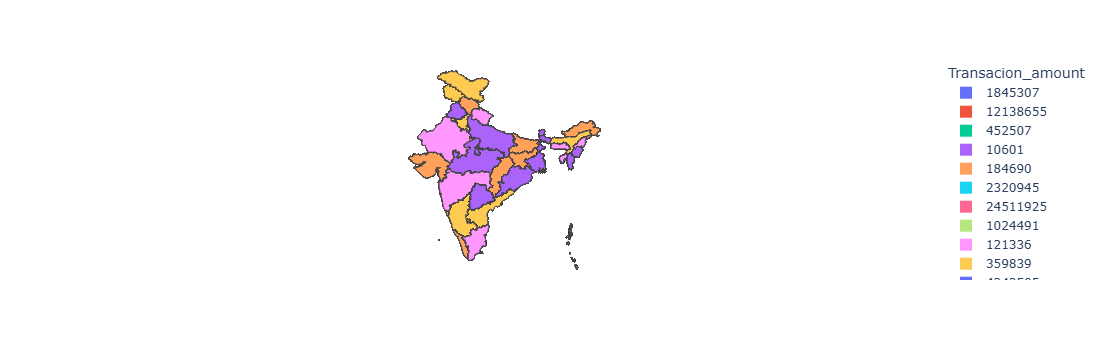

In [88]:
import pandas as pd
import plotly.express as px

# Assuming Agg_Trans is already defined
state_agg = Agg_Trans.groupby('State')['Transacion_amount'].sum().reset_index()
fig = px.choropleth(
    Agg_Trans,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locations='State',
    color='Transacion_amount',
    color_continuous_scale='Reds'
)

fig.update_geos(fitbounds="locations", visible=False)

fig.show()


In [89]:
import numpy as np
st = np.array(df['state'])
st

NameError: name 'df' is not defined

# Aggregated User

In [2]:
path="D:/pythoncode/Proj/PhonePe_Project/pulse/data/aggregated/user/country/india/state/"
Agg_user_state_list=os.listdir(path)
Agg_user_state_list

['andaman-&-nicobar-islands',
 'andhra-pradesh',
 'arunachal-pradesh',
 'assam',
 'bihar',
 'chandigarh',
 'chhattisgarh',
 'dadra-&-nagar-haveli-&-daman-&-diu',
 'delhi',
 'goa',
 'gujarat',
 'haryana',
 'himachal-pradesh',
 'jammu-&-kashmir',
 'jharkhand',
 'karnataka',
 'kerala',
 'ladakh',
 'lakshadweep',
 'madhya-pradesh',
 'maharashtra',
 'manipur',
 'meghalaya',
 'mizoram',
 'nagaland',
 'odisha',
 'puducherry',
 'punjab',
 'rajasthan',
 'sikkim',
 'tamil-nadu',
 'telangana',
 'tripura',
 'uttar-pradesh',
 'uttarakhand',
 'west-bengal']

In [3]:
columns2={'State':[], 'Year':[],'Quater':[],'User_brand':[], 'User_count':[], 'User_percentage':[]}

In [4]:
for i in Agg_user_state_list:
    p_i=path+i+"/"
    Agg_yr=os.listdir(p_i)
    for j in Agg_yr:
        p_j=p_i+j+"/"
        Agg_yr_list=os.listdir(p_j)
        for k in Agg_yr_list:
            p_k=p_j+k
            Data=open(p_k,'r')
            D=json.load(Data)
            try:
                for z in D['data']['usersByDevice']:
                  brand=z['brand']
                  count=z['count']
                  percentage=z['percentage']
                    
                  columns2['User_brand'].append(brand)
                  columns2['User_count'].append(count)
                  columns2['User_percentage'].append(percentage*100)
                  columns2['State'].append(i)
                  columns2['Year'].append(j)
                  columns2['Quater'].append(int(k.strip('.json')))
            except:
                pass
#Succesfully created a dataframe
Agg_user=pd.DataFrame(columns2)

In [5]:
Agg_user

State  Year  Quater User_brand  User_count  \
0     andaman-&-nicobar-islands  2018       1     Xiaomi        1665   
1     andaman-&-nicobar-islands  2018       1    Samsung        1445   
2     andaman-&-nicobar-islands  2018       1       Vivo         982   
3     andaman-&-nicobar-islands  2018       1       Oppo         501   
4     andaman-&-nicobar-islands  2018       1    OnePlus         332   
...                         ...   ...     ...        ...         ...   
6727                west-bengal  2022       1     Lenovo      330017   
6728                west-bengal  2022       1    Infinix      284678   
6729                west-bengal  2022       1       Asus      280347   
6730                west-bengal  2022       1      Apple      277752   
6731                west-bengal  2022       1     Others     2196334   

      User_percentage  
0           24.703264  
1           21.439169  
2           14.569733  
3            7.433234  
4            4.925816  
...               ...  
6727         1.505567  
6728         1.298726  
6729         1.278968  
6730         1.267129  
6731        10.019869  

[6732 rows x 6 columns]

In [6]:
Agg_user.isna().sum()

State              0
Year               0
Quater             0
User_brand         0
User_count         0
User_percentage    0
dtype: int64

In [7]:
Agg_user['User_percentage'] = Agg_user['User_percentage'].apply(lambda x: '{:.2f}'.format(x))

In [8]:
Agg_user

State  Year  Quater User_brand  User_count  \
0     andaman-&-nicobar-islands  2018       1     Xiaomi        1665   
1     andaman-&-nicobar-islands  2018       1    Samsung        1445   
2     andaman-&-nicobar-islands  2018       1       Vivo         982   
3     andaman-&-nicobar-islands  2018       1       Oppo         501   
4     andaman-&-nicobar-islands  2018       1    OnePlus         332   
...                         ...   ...     ...        ...         ...   
6727                west-bengal  2022       1     Lenovo      330017   
6728                west-bengal  2022       1    Infinix      284678   
6729                west-bengal  2022       1       Asus      280347   
6730                west-bengal  2022       1      Apple      277752   
6731                west-bengal  2022       1     Others     2196334   

     User_percentage  
0              24.70  
1              21.44  
2              14.57  
3               7.43  
4               4.93  
...              ...  
6727            1.51  
6728            1.30  
6729            1.28  
6730            1.27  
6731           10.02  

[6732 rows x 6 columns]

In [9]:
Agg_user['State'].unique()

array(['andaman-&-nicobar-islands', 'andhra-pradesh', 'arunachal-pradesh',
       'assam', 'bihar', 'chandigarh', 'chhattisgarh',
       'dadra-&-nagar-haveli-&-daman-&-diu', 'delhi', 'goa', 'gujarat',
       'haryana', 'himachal-pradesh', 'jammu-&-kashmir', 'jharkhand',
       'karnataka', 'kerala', 'ladakh', 'lakshadweep', 'madhya-pradesh',
       'maharashtra', 'manipur', 'meghalaya', 'mizoram', 'nagaland',
       'odisha', 'puducherry', 'punjab', 'rajasthan', 'sikkim',
       'tamil-nadu', 'telangana', 'tripura', 'uttar-pradesh',
       'uttarakhand', 'west-bengal'], dtype=object)

In [10]:
Agg_user['State'] = Agg_user['State'].replace(['andaman-&-nicobar-islands', 'andhra-pradesh', 'arunachal-pradesh',
       'assam', 'bihar', 'chandigarh', 'chhattisgarh',
       'dadra-&-nagar-haveli-&-daman-&-diu', 'delhi', 'goa', 'gujarat',
       'haryana', 'himachal-pradesh', 'jammu-&-kashmir', 'jharkhand',
       'karnataka', 'kerala', 'ladakh', 'lakshadweep', 'madhya-pradesh',
       'maharashtra', 'manipur', 'meghalaya', 'mizoram', 'nagaland',
       'odisha', 'puducherry', 'punjab', 'rajasthan', 'sikkim',
       'tamil-nadu', 'telangana', 'tripura', 'uttar-pradesh',
       'uttarakhand', 'west-bengal'],['Andaman & Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra and Nagar Haveli and Daman and Diu', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'])

In [11]:
Agg_user

State  Year  Quater User_brand  User_count User_percentage
0     Andaman & Nicobar  2018       1     Xiaomi        1665           24.70
1     Andaman & Nicobar  2018       1    Samsung        1445           21.44
2     Andaman & Nicobar  2018       1       Vivo         982           14.57
3     Andaman & Nicobar  2018       1       Oppo         501            7.43
4     Andaman & Nicobar  2018       1    OnePlus         332            4.93
...                 ...   ...     ...        ...         ...             ...
6727        West Bengal  2022       1     Lenovo      330017            1.51
6728        West Bengal  2022       1    Infinix      284678            1.30
6729        West Bengal  2022       1       Asus      280347            1.28
6730        West Bengal  2022       1      Apple      277752            1.27
6731        West Bengal  2022       1     Others     2196334           10.02

[6732 rows x 6 columns]

In [13]:
Agg_user.to_csv('Agg_User.csv')

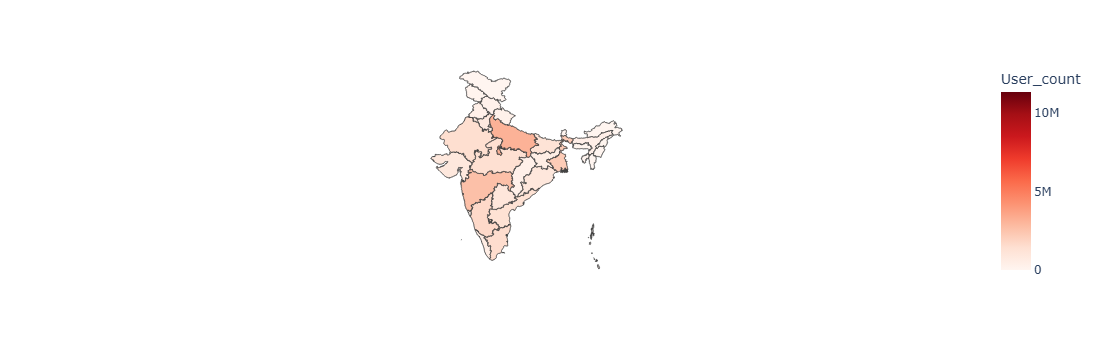

In [17]:
import pandas as pd
import plotly.express as px

# Assuming Agg_Trans is already defined
# state_agg = Agg_Trans.groupby('State')['Transacion_amount'].sum().reset_index()
fig = px.choropleth(
    Agg_user,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locations='State',
    color='User_count',
    color_continuous_scale='Reds'
)

fig.update_geos(fitbounds="locations", visible=False)

fig.show()


# Map_Trans 

In [18]:
path="D:/pythoncode/Proj/PhonePe_Project/pulse/data/map/transaction/hover/country/india/state/"
Agg_map_state_list=os.listdir(path)
Agg_map_state_list

['andaman-&-nicobar-islands',
 'andhra-pradesh',
 'arunachal-pradesh',
 'assam',
 'bihar',
 'chandigarh',
 'chhattisgarh',
 'dadra-&-nagar-haveli-&-daman-&-diu',
 'delhi',
 'goa',
 'gujarat',
 'haryana',
 'himachal-pradesh',
 'jammu-&-kashmir',
 'jharkhand',
 'karnataka',
 'kerala',
 'ladakh',
 'lakshadweep',
 'madhya-pradesh',
 'maharashtra',
 'manipur',
 'meghalaya',
 'mizoram',
 'nagaland',
 'odisha',
 'puducherry',
 'punjab',
 'rajasthan',
 'sikkim',
 'tamil-nadu',
 'telangana',
 'tripura',
 'uttar-pradesh',
 'uttarakhand',
 'west-bengal']

In [19]:
columns3={'State':[], 'Year':[],'Quater':[],'district':[], 'map_count':[], 'map_amount':[]}

In [20]:
for i in Agg_map_state_list:
  p_i= path+i+"/"
  Agg_yr=os.listdir(p_i)

  for j in Agg_yr:
      p_j=p_i+j+"/"
      Agg_yr_list=os.listdir(p_j)

      for k in Agg_yr_list:
          p_k=p_j+k
          Data=open(p_k,'r')
          F=json.load(Data)

          for z in F['data']['hoverDataList']:
              try:
                district=z['name'].split('district')[0]
                count=z['metric'][0]['count']
                amount=z['metric'][0]['amount']
    
                columns3['district'].append(district)
                columns3['map_count'].append(count)
                columns3['map_amount'].append(amount)
                columns3['State'].append(i)
                columns3['Year'].append(j)
                columns3['Quater'].append(int(k.strip('.json')))
              except:
                  pass

# print(len(columns3['district']))
# print(len(columns3['map_count']))
# print(len(columns3['map_amount']))
# print(len(columns3['State']))
# print(len(columns3['Year']))
# # print(len(columns3['Quater']))
# columns3['Quater'].append(4)
# #Succesfully created a dataframe
map_trans=pd.DataFrame(columns3)

In [21]:
map_trans

State  Year  Quater                   district  \
0      andaman-&-nicobar-islands  2018       1  north and middle andaman    
1      andaman-&-nicobar-islands  2018       1             south andaman    
2      andaman-&-nicobar-islands  2018       1                  nicobars    
3      andaman-&-nicobar-islands  2018       2  north and middle andaman    
4      andaman-&-nicobar-islands  2018       2             south andaman    
...                          ...   ...     ...                        ...   
18291                west-bengal  2024       1                     nadia    
18292                west-bengal  2024       1                   birbhum    
18293                west-bengal  2024       1           purba medinipur    
18294                west-bengal  2024       1                    maldah    
18295                west-bengal  2024       1                 darjiling    

       map_count    map_amount  
0            442  9.316631e+05  
1           5688  1.256025e+07  
2            528  1.139849e+06  
3            825  1.317863e+06  
4           9395  2.394824e+07  
...          ...           ...  
18291   42154481  7.903014e+10  
18292   24812300  4.640025e+10  
18293   46212626  9.237355e+10  
18294   42299563  7.671603e+10  
18295   18129044  2.927784e+10  

[18296 rows x 6 columns]

In [22]:
map_trans['State'] = map_trans['State'].replace(['andaman-&-nicobar-islands', 'andhra-pradesh', 'arunachal-pradesh',
       'assam', 'bihar', 'chandigarh', 'chhattisgarh',
       'dadra-&-nagar-haveli-&-daman-&-diu', 'delhi', 'goa', 'gujarat',
       'haryana', 'himachal-pradesh', 'jammu-&-kashmir', 'jharkhand',
       'karnataka', 'kerala', 'ladakh', 'lakshadweep', 'madhya-pradesh',
       'maharashtra', 'manipur', 'meghalaya', 'mizoram', 'nagaland',
       'odisha', 'puducherry', 'punjab', 'rajasthan', 'sikkim',
       'tamil-nadu', 'telangana', 'tripura', 'uttar-pradesh',
       'uttarakhand', 'west-bengal'],['Andaman & Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra and Nagar Haveli and Daman and Diu', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'])

In [24]:
map_trans['map_amount'] = map_trans['map_amount'].apply(lambda x: '{:.0f}'.format(x))

In [25]:
map_trans

State  Year  Quater                   district  map_count  \
0      Andaman & Nicobar  2018       1  north and middle andaman         442   
1      Andaman & Nicobar  2018       1             south andaman        5688   
2      Andaman & Nicobar  2018       1                  nicobars         528   
3      Andaman & Nicobar  2018       2  north and middle andaman         825   
4      Andaman & Nicobar  2018       2             south andaman        9395   
...                  ...   ...     ...                        ...        ...   
18291        West Bengal  2024       1                     nadia    42154481   
18292        West Bengal  2024       1                   birbhum    24812300   
18293        West Bengal  2024       1           purba medinipur    46212626   
18294        West Bengal  2024       1                    maldah    42299563   
18295        West Bengal  2024       1                 darjiling    18129044   

        map_amount  
0           931663  
1         12560249  
2          1139849  
3          1317863  
4         23948236  
...            ...  
18291  79030136775  
18292  46400251550  
18293  92373546681  
18294  76716033762  
18295  29277839174  

[18296 rows x 6 columns]

In [26]:
map_trans.to_csv("map_trans.csv")

# data frame of map user

In [27]:
path="D:/pythoncode/Proj/PhonePe_Project/pulse/data/map/user/hover/country/india/state/"
map_user_state_list=os.listdir(path)
map_user_state_list

['andaman-&-nicobar-islands',
 'andhra-pradesh',
 'arunachal-pradesh',
 'assam',
 'bihar',
 'chandigarh',
 'chhattisgarh',
 'dadra-&-nagar-haveli-&-daman-&-diu',
 'delhi',
 'goa',
 'gujarat',
 'haryana',
 'himachal-pradesh',
 'jammu-&-kashmir',
 'jharkhand',
 'karnataka',
 'kerala',
 'ladakh',
 'lakshadweep',
 'madhya-pradesh',
 'maharashtra',
 'manipur',
 'meghalaya',
 'mizoram',
 'nagaland',
 'odisha',
 'puducherry',
 'punjab',
 'rajasthan',
 'sikkim',
 'tamil-nadu',
 'telangana',
 'tripura',
 'uttar-pradesh',
 'uttarakhand',
 'west-bengal']

In [28]:
columns4={'State':[], 'Year':[],'Quarter':[],'district':[], 'registeredUsers':[],'appOpens':[]}

In [29]:
for i in map_user_state_list:
  p_i= path+i+"/"
  Agg_yr=os.listdir(p_i)

  for j in Agg_yr:
      p_j=p_i+j+"/"
      Agg_yr_list=os.listdir(p_j)

      for k in Agg_yr_list:
          p_k=p_j+k
          Data=open(p_k,'r')
          G=json.load(Data)

          for z_key,z_value in G['data']['hoverData'].items():

            district=z_key.split('district')[0]
            registeredUsers=z_value['registeredUsers']
            appopens=z_value['appOpens']
            columns4['district'].append(district)
            columns4['registeredUsers'].append(registeredUsers)
            columns4['appOpens'].append(appopens)
            columns4['State'].append(i)
            columns4['Year'].append(j)
            columns4['Quarter'].append(int(k.strip('.json')))


In [30]:
map_user = pd.DataFrame(columns4)

In [31]:
map_user

State  Year  Quarter                   district  \
0      andaman-&-nicobar-islands  2018        1  north and middle andaman    
1      andaman-&-nicobar-islands  2018        1             south andaman    
2      andaman-&-nicobar-islands  2018        1                  nicobars    
3      andaman-&-nicobar-islands  2018        2  north and middle andaman    
4      andaman-&-nicobar-islands  2018        2             south andaman    
...                          ...   ...      ...                        ...   
18295                west-bengal  2024        1                     nadia    
18296                west-bengal  2024        1                   birbhum    
18297                west-bengal  2024        1           purba medinipur    
18298                west-bengal  2024        1                    maldah    
18299                west-bengal  2024        1                 darjiling    

       registeredUsers  appOpens  
0                  632         0  
1                 5846         0  
2                  262         0  
3                  911         0  
4                 8143         0  
...                ...       ...  
18295          1671140  13679202  
18296          1056537  30502875  
18297          1655920  18688405  
18298          1183956  33270738  
18299           686254  31485682  

[18300 rows x 6 columns]

In [33]:
map_user['State'] = map_user['State'].replace(['andaman-&-nicobar-islands', 'andhra-pradesh', 'arunachal-pradesh',
       'assam', 'bihar', 'chandigarh', 'chhattisgarh',
       'dadra-&-nagar-haveli-&-daman-&-diu', 'delhi', 'goa', 'gujarat',
       'haryana', 'himachal-pradesh', 'jammu-&-kashmir', 'jharkhand',
       'karnataka', 'kerala', 'ladakh', 'lakshadweep', 'madhya-pradesh',
       'maharashtra', 'manipur', 'meghalaya', 'mizoram', 'nagaland',
       'odisha', 'puducherry', 'punjab', 'rajasthan', 'sikkim',
       'tamil-nadu', 'telangana', 'tripura', 'uttar-pradesh',
       'uttarakhand', 'west-bengal'],['Andaman & Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra and Nagar Haveli and Daman and Diu', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'])

In [34]:
map_user

State  Year  Quarter                   district  \
0      Andaman & Nicobar  2018        1  north and middle andaman    
1      Andaman & Nicobar  2018        1             south andaman    
2      Andaman & Nicobar  2018        1                  nicobars    
3      Andaman & Nicobar  2018        2  north and middle andaman    
4      Andaman & Nicobar  2018        2             south andaman    
...                  ...   ...      ...                        ...   
18295        West Bengal  2024        1                     nadia    
18296        West Bengal  2024        1                   birbhum    
18297        West Bengal  2024        1           purba medinipur    
18298        West Bengal  2024        1                    maldah    
18299        West Bengal  2024        1                 darjiling    

       registeredUsers  appOpens  
0                  632         0  
1                 5846         0  
2                  262         0  
3                  911         0  
4                 8143         0  
...                ...       ...  
18295          1671140  13679202  
18296          1056537  30502875  
18297          1655920  18688405  
18298          1183956  33270738  
18299           686254  31485682  

[18300 rows x 6 columns]

In [35]:
map_user.to_csv("map_user.csv")

# TOP_Transm

In [36]:
columns5={'State':[], 'Year':[],'Quarter':[],'District_pincode':[], 'Top_count':[],'Top_amount':[]}

In [37]:
path="D:/pythoncode/Proj/PhonePe_Project/pulse/data/top/transaction/country/india/state/"
map_user_state_list=os.listdir(path)
map_user_state_list

['andaman-&-nicobar-islands',
 'andhra-pradesh',
 'arunachal-pradesh',
 'assam',
 'bihar',
 'chandigarh',
 'chhattisgarh',
 'dadra-&-nagar-haveli-&-daman-&-diu',
 'delhi',
 'goa',
 'gujarat',
 'haryana',
 'himachal-pradesh',
 'jammu-&-kashmir',
 'jharkhand',
 'karnataka',
 'kerala',
 'ladakh',
 'lakshadweep',
 'madhya-pradesh',
 'maharashtra',
 'manipur',
 'meghalaya',
 'mizoram',
 'nagaland',
 'odisha',
 'puducherry',
 'punjab',
 'rajasthan',
 'sikkim',
 'tamil-nadu',
 'telangana',
 'tripura',
 'uttar-pradesh',
 'uttarakhand',
 'west-bengal']

In [38]:
for i in map_user_state_list:
  p_i= path+i+"/"
  Agg_yr=os.listdir(p_i)

  for j in Agg_yr:
      p_j=p_i+j+"/"
      Agg_yr_list=os.listdir(p_j)

      for k in Agg_yr_list:
          p_k=p_j+k
          Data=open(p_k,'r')
          H=json.load(Data)

          for z in H['data']['pincodes']:

            pincode=z['entityName']
            count=z['metric']['count']
            amount=z['metric']['amount']

              
            columns5['District_pincode'].append(pincode)
            columns5['Top_count'].append(count)
            columns5['Top_amount'].append(amount)
            columns5['State'].append(i)
            columns5['Year'].append(j)
            columns5['Quarter'].append(int(k.strip('.json')))


In [39]:
top_trans = pd.DataFrame(columns5)
top_trans

State  Year  Quarter District_pincode  Top_count  \
0     andaman-&-nicobar-islands  2018        1           744101       1622   
1     andaman-&-nicobar-islands  2018        1           744103       1223   
2     andaman-&-nicobar-islands  2018        1           744102        969   
3     andaman-&-nicobar-islands  2018        1           744105        685   
4     andaman-&-nicobar-islands  2018        1           744104        340   
...                         ...   ...      ...              ...        ...   
8919                west-bengal  2024        1           732125    4490229   
8920                west-bengal  2024        1           700006    4358390   
8921                west-bengal  2024        1           700001    4321119   
8922                west-bengal  2024        1           732201    4265219   
8923                west-bengal  2024        1           742202    3985791   

        Top_amount  
0     2.769298e+06  
1     2.238042e+06  
2     3.519060e+06  
3     1.298561e+06  
4     1.039715e+06  
...            ...  
8919  7.014125e+09  
8920  8.114395e+09  
8921  8.497021e+09  
8922  9.908795e+09  
8923  8.428173e+09  

[8924 rows x 6 columns]

In [40]:
top_trans['State'] = top_trans['State'].replace(['andaman-&-nicobar-islands', 'andhra-pradesh', 'arunachal-pradesh',
       'assam', 'bihar', 'chandigarh', 'chhattisgarh',
       'dadra-&-nagar-haveli-&-daman-&-diu', 'delhi', 'goa', 'gujarat',
       'haryana', 'himachal-pradesh', 'jammu-&-kashmir', 'jharkhand',
       'karnataka', 'kerala', 'ladakh', 'lakshadweep', 'madhya-pradesh',
       'maharashtra', 'manipur', 'meghalaya', 'mizoram', 'nagaland',
       'odisha', 'puducherry', 'punjab', 'rajasthan', 'sikkim',
       'tamil-nadu', 'telangana', 'tripura', 'uttar-pradesh',
       'uttarakhand', 'west-bengal'],['Andaman & Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra and Nagar Haveli and Daman and Diu', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'])

In [42]:
top_trans['Top_amount'] = top_trans['Top_amount'].apply(lambda x: '{:.0f}'.format(x))

In [43]:
top_trans

State  Year  Quarter District_pincode  Top_count  Top_amount
0     Andaman & Nicobar  2018        1           744101       1622     2769298
1     Andaman & Nicobar  2018        1           744103       1223     2238042
2     Andaman & Nicobar  2018        1           744102        969     3519060
3     Andaman & Nicobar  2018        1           744105        685     1298561
4     Andaman & Nicobar  2018        1           744104        340     1039715
...                 ...   ...      ...              ...        ...         ...
8919        West Bengal  2024        1           732125    4490229  7014125089
8920        West Bengal  2024        1           700006    4358390  8114395173
8921        West Bengal  2024        1           700001    4321119  8497021002
8922        West Bengal  2024        1           732201    4265219  9908795047
8923        West Bengal  2024        1           742202    3985791  8428172631

[8924 rows x 6 columns]

In [44]:
top_trans.to_csv("top_trans.csv")

# Top User

In [45]:
path="D:/pythoncode/Proj/PhonePe_Project/pulse/data/top/user/country/india/state/"
map_user_state_list=os.listdir(path)
map_user_state_list

['andaman-&-nicobar-islands',
 'andhra-pradesh',
 'arunachal-pradesh',
 'assam',
 'bihar',
 'chandigarh',
 'chhattisgarh',
 'dadra-&-nagar-haveli-&-daman-&-diu',
 'delhi',
 'goa',
 'gujarat',
 'haryana',
 'himachal-pradesh',
 'jammu-&-kashmir',
 'jharkhand',
 'karnataka',
 'kerala',
 'ladakh',
 'lakshadweep',
 'madhya-pradesh',
 'maharashtra',
 'manipur',
 'meghalaya',
 'mizoram',
 'nagaland',
 'odisha',
 'puducherry',
 'punjab',
 'rajasthan',
 'sikkim',
 'tamil-nadu',
 'telangana',
 'tripura',
 'uttar-pradesh',
 'uttarakhand',
 'west-bengal']

In [46]:
columns6={'State':[], 'Year':[],'Quarter':[],'district_pincode':[], 'registeredUsers':[]}


In [47]:
for i in map_user_state_list:
  p_i= path+i+"/"
  Agg_yr=os.listdir(p_i)

  for j in Agg_yr:
      p_j=p_i+j+"/"
      Agg_yr_list=os.listdir(p_j)

      for k in Agg_yr_list:
          p_k=p_j+k
          Data=open(p_k,'r')
          I=json.load(Data)

          for z in I['data']['pincodes']:

            pincode=z['name']
            registeredUsers=z['registeredUsers']


            columns6['district_pincode'].append(pincode)
            columns6['registeredUsers'].append(registeredUsers)
              
            columns6['State'].append(i)
            columns6['Year'].append(j)
            columns6['Quarter'].append(int(k.strip('.json')))


In [48]:
top_user = pd.DataFrame(columns6)

In [49]:
top_user

State  Year  Quarter district_pincode  \
0     andaman-&-nicobar-islands  2018        1           744103   
1     andaman-&-nicobar-islands  2018        1           744101   
2     andaman-&-nicobar-islands  2018        1           744105   
3     andaman-&-nicobar-islands  2018        1           744102   
4     andaman-&-nicobar-islands  2018        1           744104   
...                         ...   ...      ...              ...   
8920                west-bengal  2024        1           700015   
8921                west-bengal  2024        1           742304   
8922                west-bengal  2024        1           721101   
8923                west-bengal  2024        1           700150   
8924                west-bengal  2024        1           700091   

      registeredUsers  
0                1608  
1                1108  
2                1075  
3                1006  
4                 272  
...               ...  
8920           131676  
8921           127917  
8922           127891  
8923           123919  
8924           122985  

[8925 rows x 5 columns]

In [51]:
top_user['State'] = top_user['State'].replace(['andaman-&-nicobar-islands', 'andhra-pradesh', 'arunachal-pradesh',
       'assam', 'bihar', 'chandigarh', 'chhattisgarh',
       'dadra-&-nagar-haveli-&-daman-&-diu', 'delhi', 'goa', 'gujarat',
       'haryana', 'himachal-pradesh', 'jammu-&-kashmir', 'jharkhand',
       'karnataka', 'kerala', 'ladakh', 'lakshadweep', 'madhya-pradesh',
       'maharashtra', 'manipur', 'meghalaya', 'mizoram', 'nagaland',
       'odisha', 'puducherry', 'punjab', 'rajasthan', 'sikkim',
       'tamil-nadu', 'telangana', 'tripura', 'uttar-pradesh',
       'uttarakhand', 'west-bengal'],['Andaman & Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra and Nagar Haveli and Daman and Diu', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'])

In [53]:
top_user.to_csv("top_user.csv")

# top user district

In [54]:
columns7={'State':[], 'Year':[],'Quarter':[],'district_name':[], 'registeredUsers':[]}

In [55]:
for i in map_user_state_list:
  p_i= path+i+"/"
  Agg_yr=os.listdir(p_i)

  for j in Agg_yr:
      p_j=p_i+j+"/"
      Agg_yr_list=os.listdir(p_j)

      for k in Agg_yr_list:
          p_k=p_j+k
          Data=open(p_k,'r')
          J=json.load(Data)

          for z in J['data']['districts']:

            pincode=z['name']
            registeredUsers=z['registeredUsers']


            columns7['district_name'].append(pincode)
            columns7['registeredUsers'].append(registeredUsers)
              
            columns7['State'].append(i)
            columns7['Year'].append(j)
            columns7['Quarter'].append(int(k.strip('.json')))
top_user_districts = pd.DataFrame(columns7)

In [56]:
top_user_districts

State  Year  Quarter             district_name  \
0     andaman-&-nicobar-islands  2018        1             south andaman   
1     andaman-&-nicobar-islands  2018        1  north and middle andaman   
2     andaman-&-nicobar-islands  2018        1                  nicobars   
3     andaman-&-nicobar-islands  2018        2             south andaman   
4     andaman-&-nicobar-islands  2018        2  north and middle andaman   
...                         ...   ...      ...                       ...   
7395                west-bengal  2024        1                    howrah   
7396                west-bengal  2024        1                     nadia   
7397                west-bengal  2024        1           purba medinipur   
7398                west-bengal  2024        1         paschim medinipur   
7399                west-bengal  2024        1           purba bardhaman   

      registeredUsers  
0                5846  
1                 632  
2                 262  
3                8143  
4                 911  
...               ...  
7395          1737851  
7396          1671140  
7397          1655920  
7398          1498903  
7399          1377496  

[7400 rows x 5 columns]

In [57]:
top_user_districts['State'] = top_user_districts['State'].replace(['andaman-&-nicobar-islands', 'andhra-pradesh', 'arunachal-pradesh',
       'assam', 'bihar', 'chandigarh', 'chhattisgarh',
       'dadra-&-nagar-haveli-&-daman-&-diu', 'delhi', 'goa', 'gujarat',
       'haryana', 'himachal-pradesh', 'jammu-&-kashmir', 'jharkhand',
       'karnataka', 'kerala', 'ladakh', 'lakshadweep', 'madhya-pradesh',
       'maharashtra', 'manipur', 'meghalaya', 'mizoram', 'nagaland',
       'odisha', 'puducherry', 'punjab', 'rajasthan', 'sikkim',
       'tamil-nadu', 'telangana', 'tripura', 'uttar-pradesh',
       'uttarakhand', 'west-bengal'],['Andaman & Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra and Nagar Haveli and Daman and Diu', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'])

In [58]:
top_user_districts

State  Year  Quarter             district_name  \
0     Andaman & Nicobar  2018        1             south andaman   
1     Andaman & Nicobar  2018        1  north and middle andaman   
2     Andaman & Nicobar  2018        1                  nicobars   
3     Andaman & Nicobar  2018        2             south andaman   
4     Andaman & Nicobar  2018        2  north and middle andaman   
...                 ...   ...      ...                       ...   
7395        West Bengal  2024        1                    howrah   
7396        West Bengal  2024        1                     nadia   
7397        West Bengal  2024        1           purba medinipur   
7398        West Bengal  2024        1         paschim medinipur   
7399        West Bengal  2024        1           purba bardhaman   

      registeredUsers  
0                5846  
1                 632  
2                 262  
3                8143  
4                 911  
...               ...  
7395          1737851  
7396          1671140  
7397          1655920  
7398          1498903  
7399          1377496  

[7400 rows x 5 columns]

In [59]:
top_user_districts.to_csv("top_user_district.csv")

# creating connection with MYSQL

In [73]:
import mysql.connector as sql

try:
    mydb = sql.connect(
        host="localhost",
        user="root",
        password="",
        database="phonepe_pulse"
    )
    cursor = mydb.cursor()
    print("Connection successful")
except sql.Error as err:
    print(f"Error: {err}")


Connection successful


In [74]:
q = """create table agg_trans (
State varchar(100), 
Year int, 
Quarter int, 
Transaction_type varchar(100), 
Transaction_count bigint, 
Transaction_amount double)""" 

cursor.execute(q)


In [101]:
q = "show tables"
cursor.execute(q)
for i in cursor:
    print(i)

('agg_trans',)
('agg_user',)


In [104]:
for i,j in  Agg_Trans.iterrows():
    q = "insert into agg_trans values(%s,%s,%s,%s,%s,%s)"
    cursor.execute(q,tuple(j))
    mydb.commit()

In [100]:
q = """create table agg_user (
State varchar(100), 
Year int, 
Quarter int, 
User_brand varchar(100), 
User_count bigint, 
User_percentage double)""" 

cursor.execute(q)


In [105]:
for i,j in  Agg_user.iterrows():
    q = "insert into agg_user values(%s,%s,%s,%s,%s,%s)"
    cursor.execute(q,tuple(j))
    mydb.commit()

In [106]:
q = """create table map_trans (
State varchar(100), 
Year int, 
Quarter int, 
District varchar(100), 
Map_count bigint, 
Map_amount double)""" 

cursor.execute(q)


In [107]:
for i,j in  map_trans.iterrows():
    q = "insert into map_trans values(%s,%s,%s,%s,%s,%s)"
    cursor.execute(q,tuple(j))
    mydb.commit()

In [108]:
q = """create table map_user (
State varchar(100), 
Year int, 
Quarter int, 
District varchar(100), 
Registered_user bigint, 
App_open double)""" 

cursor.execute(q)


In [109]:
for i,j in  map_user.iterrows():
    q = "insert into map_user values(%s,%s,%s,%s,%s,%s)"
    cursor.execute(q,tuple(j))
    mydb.commit()

In [110]:
q = """create table top_trans (
State varchar(100), 
Year int, 
Quarter int, 
District_pincode int, 
Top_count bigint, 
Top_amount double)""" 

cursor.execute(q)


In [111]:
for i,j in  top_trans.iterrows():
    q = "insert into top_trans values(%s,%s,%s,%s,%s,%s)"
    cursor.execute(q,tuple(j))
    mydb.commit()

In [112]:
q = """create table top_user (
State varchar(100), 
Year int, 
Quarter int, 
District_pincode int, 
Registered_user bigint)""" 

cursor.execute(q)


In [114]:
for i,j in  top_user.iterrows():
    q = "insert into top_user values(%s,%s,%s,%s,%s)"
    cursor.execute(q,tuple(j))
    mydb.commit()

In [116]:
q = """create table top_user_dist (
State varchar(100), 
Year int, 
Quarter int, 
District_name varchar(100), 
Registered_user bigint)""" 

cursor.execute(q)


In [118]:
for i,j in  top_user_districts.iterrows():
    q = "insert into top_user_dist values(%s,%s,%s,%s,%s)"
    cursor.execute(q,tuple(j))
    mydb.commit()

In [119]:
q = "show tables"
cursor.execute(q)
for i in cursor:
    print(i)

('agg_trans',)
('agg_user',)
('map_trans',)
('map_user',)
('top_trans',)
('top_user',)
('top_user_dist',)
